In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [2]:
evds=evdsAPI('dsIC3fiGlu')


In [3]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4611,05-10-2023,27.5812
4612,06-10-2023,27.5759
4613,09-10-2023,27.6076
4614,10-10-2023,27.7058


In [4]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127


In [5]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


In [6]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [7]:

inflation=pd.DataFrame.from_dict({'Tarih':["2023-10"],'TÜFE': [1760]})
inflation=pd.concat([enf,inflation],axis=0)
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31
211,2023-9,1691.04


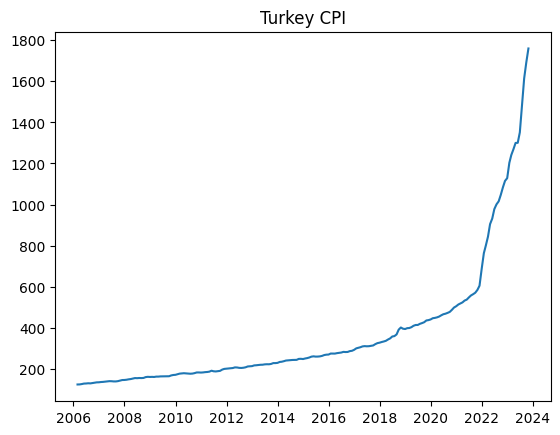

In [8]:
dates=pd.date_range('2006-02-01','2023-11-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [9]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127


In [10]:
dates= pd.date_range('2006-02-01','2023-11-01' , freq='1M')

            
df6=df6.set_index(dates)

df6["Onceki USD/TL"]=df6["USD/TL"].shift(1)
df6.iloc[0,1]=1.32
df6


,USD/TL,Onceki USD/TL
2006-02-28,1.326535,1.320000
2006-03-31,1.335139,1.326535
2006-04-30,1.337345,1.335139
2006-05-31,1.420659,1.337345
2006-06-30,1.600536,1.420659
...,...,...
2023-06-30,23.106042,19.719514
2023-07-31,26.470338,23.106042
2023-08-31,26.999127,26.470338
2023-09-30,26.989448,26.999127


In [11]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [12]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply=money_supply.set_index(pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1))
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money1=pd.DataFrame.from_dict({'Tarih':["2023-10"],'Para Arzi': [13095000000]})
money=pd.concat([money_supply,money1],axis=0)
money


,Tarih,Para Arzi
2006-02-01 00:00:00,2006-2,2.423895e+08
2006-03-01 00:00:00,2006-3,2.494857e+08
2006-04-01 00:00:00,2006-4,2.521919e+08
2006-05-01 00:00:00,2006-5,2.751947e+08
2006-06-01 00:00:00,2006-6,2.791388e+08
...,...,...
2023-06-01 00:00:00,2023-6,1.083453e+10
2023-07-01 00:00:00,2023-7,1.147848e+10
2023-08-01 00:00:00,2023-8,1.202532e+10
2023-09-01 00:00:00,2023-9,1.234928e+10


In [13]:
money=money.set_index(pd.date_range('2006-02-01','2023-11-01' , freq='1M'))
money["Para Arzi"]=money["Para Arzi"]/1e+08
del money["Tarih"]
money["Para Arzi Onceki"]=money["Para Arzi"].shift(1)
money=money.dropna(axis=0)
money


,Para Arzi,Para Arzi Onceki
2006-03-31,2.494857,2.423895
2006-04-30,2.521919,2.494857
2006-05-31,2.751947,2.521919
2006-06-30,2.791388,2.751947
2006-07-31,2.711670,2.791388
...,...,...
2023-06-30,108.345324,94.093167
2023-07-31,114.784753,108.345324
2023-08-31,120.253199,114.784753
2023-09-30,123.492792,120.253199


In [14]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4604,26-09-2023,94.46
4605,27-09-2023,97.10
4606,28-09-2023,96.64
4607,29-09-2023,95.86


In [15]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle

brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-06-30,74.839091
2023-07-31,80.108095
2023-08-31,86.147727


In [16]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-28','2023-11-29' , freq='1M')

df14["Brent"]=brent["TP_BRENTPETROL_EUBP"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\Bora\AppData\Local\Temp\ipykernel_4084\1303924978.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-06-30,74.839091
2023-07-31,80.108095
2023-08-31,86.147727


In [17]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [18]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952
210,2023-8,99.238055


In [19]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=pd.concat([df3,pd.DataFrame({"Kredi": [106.01]})],axis=0)
df3=df3.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
df3

C:\Users\Bora\AppData\Local\Temp\ipykernel_4084\3817705556.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
2006-02-28,1.381847
2006-03-31,1.481222
2006-04-30,1.527510
2006-05-31,1.664881
2006-06-30,1.740395
...,...
2023-06-30,95.646045
2023-07-31,98.468952
2023-08-31,99.238055
2023-09-30,102.582110


In [20]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
208,2023-6,12.84
209,2023-7,17.50
210,2023-8,23.50
211,2023-9,31.00


C:\Users\Bora\AppData\Local\Temp\ipykernel_4084\1609234707.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


Text(0.5, 1.0, 'TCMB Fonlama Faizi')

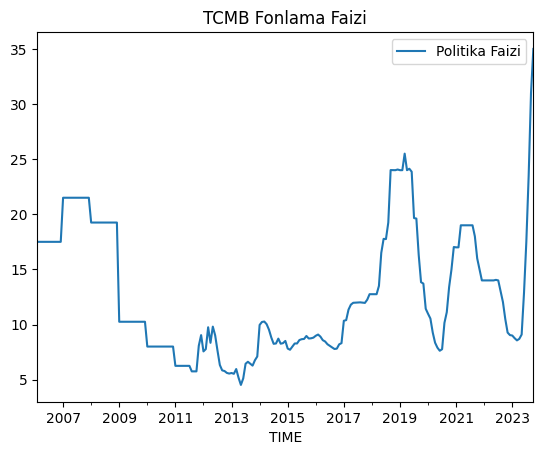

In [21]:
dates=pd.date_range('2006-02-28','2023-11-29' , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz.plot(label="TCMB Fonlama Faizi")
plt.title("TCMB Fonlama Faizi")

In [22]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kfaiz.columns=["Tarih","Kredi Faizi"]
kfaiz=kfaiz.set_index(kfaiz["Tarih"])
del kfaiz["Tarih"]
kfaiz=kfaiz.astype(float)
kfaiz=kfaiz.set_index(pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1))
kfaiz=pd.concat([kfaiz,pd.DataFrame({"Kredi Faizi": [61.83]})],axis=0)
kfaiz=kfaiz.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
kfaiz

,Kredi Faizi
2006-02-28,17.2975
2006-03-31,17.0080
2006-04-30,16.2075
2006-05-31,16.3000
2006-06-30,19.6700
...,...
2023-06-30,38.5600
2023-07-31,45.8250
2023-08-31,45.7650
2023-09-30,56.2980


In [23]:
df["Yıllık Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))


In [24]:
X=pd.concat([df6["USD/TL"],money["Para Arzi"],df14.Brent,df3.Kredi,pfaiz["Politika Faizi"]],axis=1)
X.columns=["USD/TL","Para Arzi","Brent","Kredi","Politika Faizi"]
X=X.dropna(axis=0)
X=X.head(211)
X.columns=["USDTL","ParaArzi","Brent","Kredi","PolitikaFaizi"]
X["ParaArziLag1"]=X["ParaArzi"].shift(1)
X["USDTLLag1"]=X["USDTL"].shift(1)

X=X.dropna(axis=0)
X


,USDTL,ParaArzi,Brent,Kredi,PolitikaFaizi,ParaArziLag1,USDTLLag1
2006-04-30,1.337345,2.521919,70.260000,1.527510,17.50,2.494857,1.335139
2006-05-31,1.420659,2.751947,69.776957,1.664881,17.50,2.521919,1.337345
2006-06-30,1.600536,2.791388,68.555909,1.740395,17.50,2.751947,1.420659
2006-07-31,1.558267,2.711670,73.674286,1.731811,17.50,2.791388,1.600536
2006-08-31,1.469245,2.754820,73.230435,1.742468,17.50,2.711670,1.558267
...,...,...,...,...,...,...,...
2023-05-31,19.719514,94.093167,75.466000,88.043441,9.09,95.059993,19.337032
2023-06-30,23.106042,108.345324,74.839091,95.646045,12.84,94.093167,19.719514
2023-07-31,26.470338,114.784753,80.108095,98.468952,17.50,108.345324,23.106042
2023-08-31,26.999127,120.253199,86.147727,99.238055,23.50,114.784753,26.470338


In [25]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y=y.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
y=y.iloc[2:212]
y


,CPI
2006-04-30,125.84
2006-05-31,128.20
2006-06-30,128.63
2006-07-31,129.72
2006-08-31,129.15
...,...
2023-05-31,1300.60
2023-06-30,1351.59
2023-07-31,1479.84
2023-08-31,1614.31


In [555]:
data=pd.concat([X,y],axis=1)
data

,USDTL,ParaArzi,Brent,Kredi,PolitikaFaizi,ParaArziLag1,USDTLLag1,CPI
2006-04-30,1.337345,2.521919,70.260000,1.527510,17.50,2.494857,1.335139,125.84
2006-05-31,1.420659,2.751947,69.776957,1.664881,17.50,2.521919,1.337345,128.20
2006-06-30,1.600536,2.791388,68.555909,1.740395,17.50,2.751947,1.420659,128.63
2006-07-31,1.558267,2.711670,73.674286,1.731811,17.50,2.791388,1.600536,129.72
2006-08-31,1.469245,2.754820,73.230435,1.742468,17.50,2.711670,1.558267,129.15
...,...,...,...,...,...,...,...,...
2023-05-31,19.719514,94.093167,75.466000,88.043441,9.09,95.059993,19.337032,1300.60
2023-06-30,23.106042,108.345324,74.839091,95.646045,12.84,94.093167,19.719514,1351.59
2023-07-31,26.470338,114.784753,80.108095,98.468952,17.50,108.345324,23.106042,1479.84
2023-08-31,26.999127,120.253199,86.147727,99.238055,23.50,114.784753,26.470338,1614.31


In [28]:
from statsmodels.formula.api import ols
model = ols('CPI ~   USDTL + USDTLLag1 * ParaArzi * ParaArziLag1 * Brent * Kredi * PolitikaFaizi', data = data.iloc[:-6]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.381e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.32e-255
Time:                        19:54:35   Log-Likelihood:                -452.37
No. Observations:                 204   AIC:                             1035.
Df Residuals:                     139   BIC:                             1250.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   156.4754    107.901      1.450      0.149     -56.865     369.815
USDTL                                                        -5.1856      2.462     -2.106      0.037     -10.054      -0.317
USDTLLag1                                                  -224.9105    132.744     -1.694      0.092    -487.369      37.548
ParaArzi                                                     21.4140     64.469      0.332      0.740    -106.052     148.880
USDTLLag1:ParaArzi                                           -6.6492     49.970     -0.133      0.894    -105.449      92.151
ParaArziLag1                                                139.9526     64.566      2.168      0.032      12.295     267.610
USDTLLag1:ParaArziLag1                                       19.6584     45.332      0.434      0.665     -69.971     109.288
ParaArzi:ParaArziLag1                                       -19.1863     11.730     -1.636      0.104     -42.379       4.006
USDTLLag1:ParaArzi:ParaArziLag1                               2.9322      0.784      3.742      0.000       1.383       4.481
Brent                                                         0.5204      1.311      0.397      0.692      -2.072       3.113
USDTLLag1:Brent                                               1.8899      1.768      1.069      0.287      -1.607       5.386
ParaArzi:Brent                                               -0.4665      0.751     -0.621      0.536      -1.952       1.019
USDTLLag1:ParaArzi:Brent                                      0.2300      0.742      0.310      0.757      -1.236       1.696
ParaArziLag1:Brent                                           -1.6209      0.805     -2.014      0.046      -3.212      -0.030
USDTLLag1:ParaArziLag1:Brent                                 -0.1133      0.718     -0.158      0.875      -1.532       1.305
ParaArzi:ParaArziLag1:Brent                                   0.1943      0.163      1.193      0.235      -0.128       0.516
USDTLLag1:ParaArzi:ParaArziLag1:Brent                        -0.0393      0.010     -3.780      0.000      -0.060      -0.019
Kredi                                                      -102.1091     25.361     -4.026      0.000    -152.252     -51.966
USDTLLag1:Kredi                                               8.3654     20.050      0.417      0.677     -31.277      48.007
ParaArzi:Kredi                                               12.5701      6.563      1.915      0.058      -0.407      25.547
USDTLLag1:ParaArzi:Kredi                                     -1.4846      0.747     -1.987      0.049      -2.962      -0.007
ParaArziLag1:Kredi                                         

In [29]:
import statsmodels.api as sm
coefs=pd.DataFrame(sm.stats.anova_lm(model))
coefs["PR(>F)"].sort_values(ascending=True).head(10)

USDTL                                    3.282328e-282
ParaArzi                                 2.936587e-130
USDTLLag1                                5.523940e-113
USDTLLag1:ParaArzi:ParaArziLag1          8.197116e-101
USDTLLag1:Brent                           1.250305e-68
USDTLLag1:ParaArzi:ParaArziLag1:Brent     1.562745e-58
Brent                                     9.966028e-56
USDTLLag1:ParaArziLag1                    7.331606e-46
ParaArziLag1                              5.606878e-35
Brent:Kredi                               3.810684e-26
Name: PR(>F), dtype: float64

In [30]:
model = ols('CPI ~   USDTL    + ParaArzi + USDTLLag1  + USDTLLag1:Brent + Brent  ', data = data.iloc[:-6]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7487.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.83e-223
Time:                        19:54:39   Log-Likelihood:                -865.99
No. Observations:                 204   AIC:                             1744.
Df Residuals:                     198   BIC:                             1764.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         119.4961      7.697     15.525      0.000     104.317     134.675
USDTL             -23.6086      4.789     -4.930      0.000     -33.053     -14.165
ParaArzi           11.0296      0.738     14.953      0.000       9.575      12.484
USDTLLag1          26.4355      4.794      5.515      0.000      16.982      35.889
USDTLLag1:Brent     0.0532      0.018      2.937      0.004       0.017       0.089
Brent              -0.0903      0.082     -1.106      0.270      -0.251       0.071
==============================================================================
Omnibus:                        9.498   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.233
Skew:                          -0.418   Prob(JB):                      0.00600
Kurtosis:                       3.711   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X=data.iloc[:,:-1]



In [32]:
model.predict(X.tail(6))

2023-04-30    1291.774838
2023-05-31    1273.705846
2023-06-30    1361.995633
2023-07-31    1462.587904
2023-08-31    1621.636430
2023-09-30    1684.184919
dtype: float64

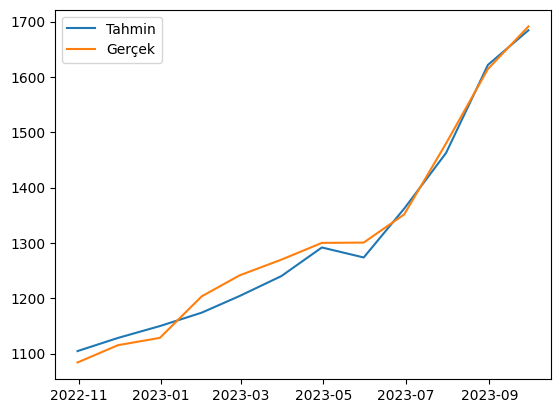

In [33]:
plt.plot(model.predict(X.tail(12)),label="Tahmin")
plt.plot(y.tail(12),label="Gerçek")
plt.legend()


In [34]:
tahmin=pd.DataFrame()
tahmin["Gerçek"]=y.tail(6)
tahmin["Tahmin"]=model.predict(X.tail(6))
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(tahmin["Tahmin"],tahmin["Gerçek"]))
rmse

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

14.709345831382626

In [35]:
tahmin["Aylık Gerçek"]=tahmin["Gerçek"].pct_change(periods=1)*100
tahmin["Aylık Tahmin"]=((tahmin["Tahmin"]/tahmin["Gerçek"].shift(1))-1)*100
tahmin

,Gerçek,Tahmin,Aylık Gerçek,Aylık Tahmin
2023-04-30,1300.04,1291.774838,NaN,NaN
2023-05-31,1300.60,1273.705846,0.043076,-2.025642
2023-06-30,1351.59,1361.995633,3.920498,4.720562
2023-07-31,1479.84,1462.587904,9.488824,8.212395
2023-08-31,1614.31,1621.636430,9.086793,9.581876
2023-09-30,1691.04,1684.184919,4.753114,4.328470


In [38]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np



ar_model = AutoReg(df6['USD/TL'].head(212), lags=1)
ar_fit = ar_model.fit()
ar_forecast = ar_fit.predict(start="2023-10-30", end="2024-09-30", dynamic=False)
ar_forecast




2023-10-31    28.012569
2023-11-30    29.076927
2023-12-31    30.184183
2024-01-31    31.336067
2024-02-29    32.534377
2024-03-31    33.780984
2024-04-30    35.077835
2024-05-31    36.426956
2024-06-30    37.830451
2024-07-31    39.290514
2024-08-31    40.809425
2024-09-30    42.389554
Freq: M, dtype: float64

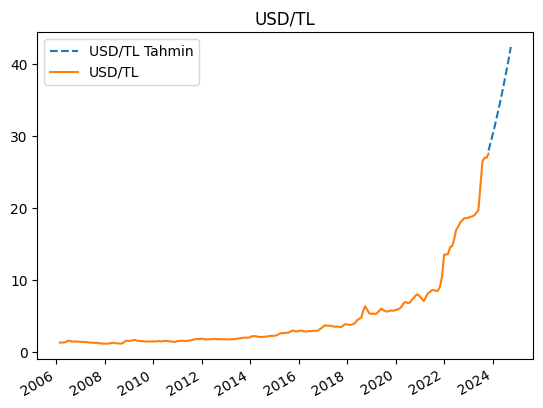

In [39]:
usdtahmin=pd.DataFrame(ar_forecast)
usdtahmin.columns=["USD Tahmin"]
usdtahmin["USD Tahmin"]=usdtahmin["USD Tahmin"].astype(float)
usdtahmin=usdtahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
plt.plot(usdtahmin,"--",label="USD/TL Tahmin")
df6["USD/TL"].plot(label="USD/TL")
plt.title("USD/TL")
plt.legend()


c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppD

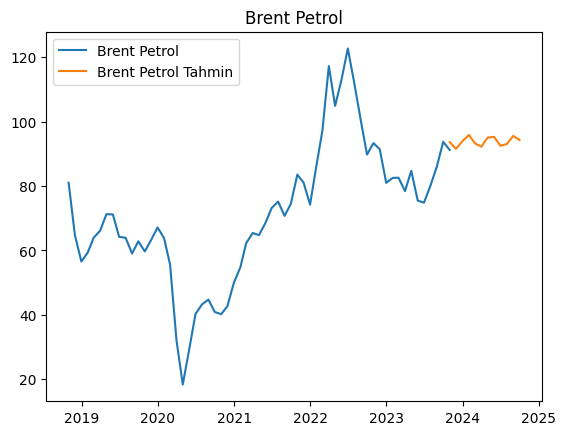

In [40]:
# Modeli eğitim verisi üzerinde eğitme
model = ARIMA(df14["Brent"].head(212), order=(4,1,2))
# Modeli tekrar eğitim verisi üzerinde eğitme
model_fit = model.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=12)
predictions = forecast.values
predictions = pd.DataFrame(predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
brenttahmin=pd.DataFrame(predictions)
brenttahmin.columns=["Brent Tahmin"]
brenttahmin=brenttahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
plt.plot(df14.tail(61),label="Brent Petrol")
plt.plot(brenttahmin.tail(61),label="Brent Petrol Tahmin")
plt.title("Brent Petrol")
plt.legend()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


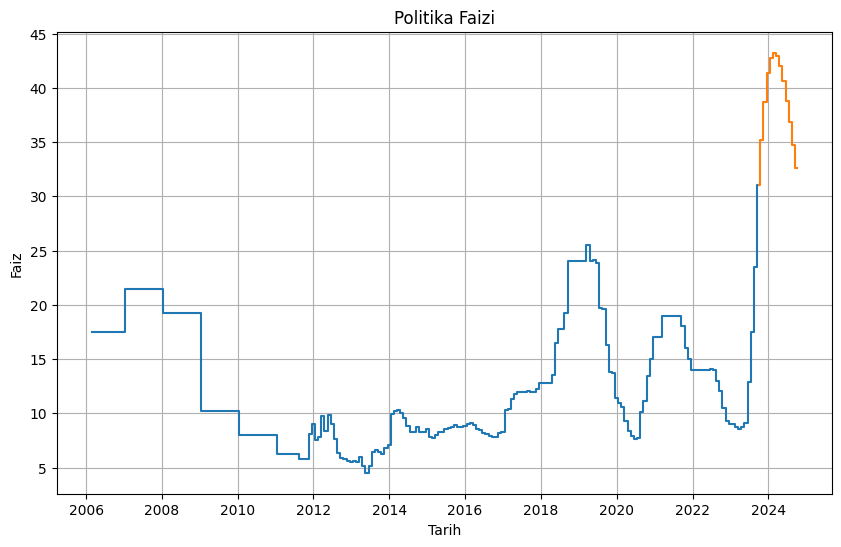

In [41]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(pfaiz.head(212), order=(4,1,1))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))

faiztahmin=pd.DataFrame(optimal_future_predictions)
faiztahmin.columns=["Politika Faizi"]
faiztahmin=faiztahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
faiztahmin=pd.concat([pfaiz.head(212),faiztahmin],axis=0)
kademeli = [faiztahmin.iloc[0]]
for i in range(1, len(faiztahmin)):
    kademeli.append(faiztahmin.iloc[i])

# Tarihleri x ekseni olarak ve kademeli fiyatları y ekseni olarak kullanarak kademeli bir grafik çiz
plt.figure(figsize=(10, 6))
plt.step(faiztahmin[:212].index, kademeli[:212], where='mid', linestyle='-')
plt.step(faiztahmin[211:].index, kademeli[211:], where='mid', linestyle='-')
plt.title('Politika Faizi')
plt.xlabel('Tarih')
plt.ylabel('Faiz')
plt.grid(True)


In [42]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(money["Para Arzi"].head(212), order=(4,3,4))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
paraarzitahmin=pd.DataFrame(optimal_future_predictions)
paraarzitahmin.columns=["Para Arzı Tahmin"]
paraarzitahmin=paraarzitahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
paraarzitahmin=paraarzitahmin.tail(12)
paraarzitahmin


c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Para Arzı Tahmin
2023-10-31,134.300567
2023-11-30,142.074590
2023-12-31,146.981451
2024-01-31,153.628404
2024-02-29,160.652723
2024-03-31,166.756281
2024-04-30,174.545581
2024-05-31,181.584534
2024-06-30,189.116890
2024-07-31,197.371394


In [43]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(df3["Kredi"].head(212), order=(4,3,4))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
kreditahmin=pd.DataFrame(optimal_future_predictions)
kreditahmin.columns=["Kredi Tahmin"]
kreditahmin=kreditahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
kreditahmin=kreditahmin.tail(12)
kreditahmin

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Kredi Tahmin
2023-10-31,106.014339
2023-11-30,108.341795
2023-12-31,112.112480
2024-01-31,115.847979
2024-02-29,118.067433
2024-03-31,121.462983
2024-04-30,125.584769
2024-05-31,128.058339
2024-06-30,131.047701
2024-07-31,135.347269


In [44]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(kfaiz["Kredi Faizi"].head(212), order=(1,1,0))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
optimal_future_predictions.columns=["Kredi Faizi Tahmin"]



kfaiztahmin=pd.DataFrame(optimal_future_forecast)
kfaiztahmin=kfaiztahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
kfaiztahmin.columns=["Kredi Faizi Tahmin"]
kfaiztahmin=kfaiztahmin.tail(12)
kfaiztahmin

,Kredi Faizi Tahmin
2023-10-31,61.831260
2023-11-30,64.738025
2023-12-31,66.265025
2024-01-31,67.067198
2024-02-29,67.488600
2024-03-31,67.709974
2024-04-30,67.826267
2024-05-31,67.887359
2024-06-30,67.919453
2024-07-31,67.936312


In [45]:
X

,USDTL,ParaArzi,Brent,Kredi,PolitikaFaizi,ParaArziLag1,USDTLLag1
2006-04-30,1.337345,2.521919,70.260000,1.527510,17.50,2.494857,1.335139
2006-05-31,1.420659,2.751947,69.776957,1.664881,17.50,2.521919,1.337345
2006-06-30,1.600536,2.791388,68.555909,1.740395,17.50,2.751947,1.420659
2006-07-31,1.558267,2.711670,73.674286,1.731811,17.50,2.791388,1.600536
2006-08-31,1.469245,2.754820,73.230435,1.742468,17.50,2.711670,1.558267
...,...,...,...,...,...,...,...
2023-05-31,19.719514,94.093167,75.466000,88.043441,9.09,95.059993,19.337032
2023-06-30,23.106042,108.345324,74.839091,95.646045,12.84,94.093167,19.719514
2023-07-31,26.470338,114.784753,80.108095,98.468952,17.50,108.345324,23.106042
2023-08-31,26.999127,120.253199,86.147727,99.238055,23.50,114.784753,26.470338


In [46]:
tahmindf=pd.DataFrame()
tahmindf["USDTL"]=usdtahmin["USD Tahmin"]
tahmindf["ParaArzi"]=paraarzitahmin["Para Arzı Tahmin"]
tahmindf["Brent"]=brenttahmin["Brent Tahmin"]
tahmindf["Kredi"]=kreditahmin
tahmindf["PolitikaFaizi"]=faiztahmin.tail(12)["Politika Faizi"]
tahmindf=pd.concat([X[["USDTL","ParaArzi","Brent","Kredi","PolitikaFaizi"]],tahmindf],axis=0)
tahmindf.columns=["USDTL","ParaArzi","Brent","Kredi","PolitikaFaizi"]
tahmindf["ParaArziLag1"]=tahmindf["ParaArzi"].shift(1)
tahmindf["USDTLLag1"]=tahmindf["USDTL"].shift(1)
tahmindf=tahmindf.dropna(axis=0)
tahmindf.tail(12)


,USDTL,ParaArzi,Brent,Kredi,PolitikaFaizi,ParaArziLag1,USDTLLag1
2023-10-31,28.012569,134.300567,93.647868,106.014339,35.213897,123.492792,26.989448
2023-11-30,29.076927,142.074590,91.563578,108.341795,38.726700,134.300567,28.012569
2023-12-31,30.184183,146.981451,93.908187,112.112480,41.393153,142.074590,29.076927
2024-01-31,31.336067,153.628404,95.864123,115.847979,42.734110,146.981451,30.184183
2024-02-29,32.534377,160.652723,93.272425,118.067433,43.237055,153.628404,31.336067
2024-03-31,33.780984,166.756281,92.207022,121.462983,42.978736,160.652723,32.534377
2024-04-30,35.077835,174.545581,95.032294,125.584769,42.037924,166.756281,33.780984
2024-05-31,36.426956,181.584534,95.263958,128.058339,40.612403,174.545581,35.077835
2024-06-30,37.830451,189.116890,92.483277,131.047701,38.832044,181.584534,36.426956
2024-07-31,39.290514,197.371394,93.052698,135.347269,36.822212,189.116890,37.830451


In [47]:
model = ols('CPI ~   USDTL    + ParaArzi + USDTLLag1  + USDTLLag1:Brent + Brent  ', data = data).fit()
tahmin1=pd.DataFrame(model.predict(tahmindf.tail(12)))
tahmin1.columns=["TÜFE"]
tahmin1

,TÜFE
2023-10-31,1783.806154
2023-11-30,1874.374109
2023-12-31,1939.178771
2024-01-31,2023.456885
2024-02-29,2105.370421
2024-03-31,2179.393432
2024-04-30,2279.069927
2024-05-31,2366.447883
2024-06-30,2454.200929
2024-07-31,2556.364847


In [478]:
commodity=pd.read_csv("C:/Users/Bora/Downloads/commodity.csv")
commodity=commodity.set_index(pd.date_range(start="2001-01-01",end="2023-10-01",freq="1M"))
del commodity["date"]
commodity.columns=["Commodity Index"]
commodity=commodity.iloc[63:]
commodity

,Commodity Index
2006-04-30,551.87
2006-05-31,548.17
2006-06-30,538.28
2006-07-31,553.71
2006-08-31,567.43
...,...
2023-05-31,588.69
2023-06-30,591.07
2023-07-31,619.75
2023-08-31,627.97


In [556]:
data["CommodityIndex"]=commodity
data["KrediFaizi"]=kfaiz
data=data[["USDTL","ParaArzi","Brent","Kredi","PolitikaFaizi","KrediFaizi","CPI"]]
data

,USDTL,ParaArzi,Brent,Kredi,PolitikaFaizi,KrediFaizi,CPI
2006-04-30,1.337345,2.521919,70.260000,1.527510,17.50,16.2075,125.84
2006-05-31,1.420659,2.751947,69.776957,1.664881,17.50,16.3000,128.20
2006-06-30,1.600536,2.791388,68.555909,1.740395,17.50,19.6700,128.63
2006-07-31,1.558267,2.711670,73.674286,1.731811,17.50,25.2825,129.72
2006-08-31,1.469245,2.754820,73.230435,1.742468,17.50,25.5075,129.15
...,...,...,...,...,...,...,...
2023-05-31,19.719514,94.093167,75.466000,88.043441,9.09,32.0225,1300.60
2023-06-30,23.106042,108.345324,74.839091,95.646045,12.84,38.5600,1351.59
2023-07-31,26.470338,114.784753,80.108095,98.468952,17.50,45.8250,1479.84
2023-08-31,26.999127,120.253199,86.147727,99.238055,23.50,45.7650,1614.31


In [559]:
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import VAR
data1=data.iloc[:-1]
parametreler={
    "maxlags":list(range(1,13)),
    "ic":["aic","bic","hqic","fpe"],
    "verbose":[True,False],
    "trend":["c","ct","ctt","n"]

}
pg=pd.DataFrame(list(ParameterGrid(param_grid=parametreler)))

rmse=[]
for i in range(len(pg)):
# VECM modelini oluşturma ve eğitme

   model = VAR(data1)
   model_fitted = model.fit(maxlags=pg["maxlags"].iloc[i],ic=pg["ic"].iloc[i],verbose=pg["verbose"].iloc[i],trend=pg["trend"].iloc[i])
   lag_order = model_fitted.k_ar
   forecast = model_fitted.forecast(data1.values[-lag_order:],steps=1)
   forecast_var = pd.DataFrame(forecast[:,6],columns=["Tahmin"])
   forecast_var=forecast_var.set_index(pd.date_range('2023-09-01','2023-10-01' , freq='1M'))
   forecast_var["Gerçek"]=y["CPI"].tail(1)
   rmse.append(np.abs(1-(forecast_var["Tahmin"].sum()/forecast_var["Gerçek"].sum())))
pg["rmse"]=rmse
pg=pg.sort_values(by="rmse",ascending=True)
pg

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC ->  1>
Using 1 based on aic criterion
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC ->  1>
Using 1 based on aic criterion
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC ->  1>
Using 1 based on aic criterion
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC ->  1>
Using 1 based on aic criterion
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 2, BIC -> 2, FPE -> 2, HQIC ->  2>
Using 2 based on aic criterion
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 2, BIC -> 2, FPE -> 2, HQIC ->  2>
Using 2 based on aic criterion
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected 

,ic,maxlags,trend,verbose,rmse
124,bic,4,ctt,True,0.000454
165,bic,9,ctt,False,0.000454
148,bic,7,ctt,True,0.000454
141,bic,6,ctt,False,0.000454
140,bic,6,ctt,True,0.000454
...,...,...,...,...,...
67,aic,9,ct,False,0.019219
43,aic,6,ct,False,0.019421
42,aic,6,ct,True,0.019421
331,fpe,6,ct,False,0.019421


In [561]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.model_selection import ParameterGrid




model = VAR(data1)
model_fitted = model.fit(maxlags=4,ic="bic",verbose=True,trend="ctt")


lag_order = model_fitted.k_ar
forecast = model_fitted.forecast(data1.values[-lag_order:],steps=1)
forecast_var = pd.DataFrame(forecast[:,6],columns=["Tahmin"])
forecast_var=forecast_var.set_index(pd.date_range('2023-09-01','2023-10-01' , freq='1M'))
forecast_var["Gerçek"]=y["CPI"].tail(1)
forecast_var



<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 2, FPE -> 4, HQIC ->  3>
Using 2 based on bic criterion


,Tahmin,Gerçek
2023-09-30,1690.272581,1691.04


In [666]:

model = VAR(data)
model_fitted = model.fit(maxlags=4,ic="bic",verbose=True,trend="ctt")


lag_order = model_fitted.k_ar
forecast = model_fitted.forecast(data.values[-lag_order:],steps=12)
forecast_var = pd.DataFrame(forecast[:,6],columns=["TÜFE"])
forecast_var=forecast_var.set_index(pd.date_range('2023-10-01','2024-10-01' , freq='1M'))
forecast_var

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 2, FPE -> 4, HQIC ->  4>
Using 2 based on bic criterion


,TÜFE
2023-10-31,1757.859898
2023-11-30,1837.580985
2023-12-31,1935.323770
2024-01-31,2040.934407
2024-02-29,2146.903968
2024-03-31,2253.267759
2024-04-30,2363.936509
2024-05-31,2481.898862
2024-06-30,2608.032317
2024-07-31,2742.245731


In [573]:
data["CommodityIndex"]=commodity
data

C:\Users\Bora\AppData\Local\Temp\ipykernel_4084\3920976772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CommodityIndex"]=commodity


,USDTL,ParaArzi,Brent,Kredi,PolitikaFaizi,KrediFaizi,CPI,CommodityIndex
2006-04-30,1.337345,2.521919,70.260000,1.527510,17.50,16.2075,125.84,551.87
2006-05-31,1.420659,2.751947,69.776957,1.664881,17.50,16.3000,128.20,548.17
2006-06-30,1.600536,2.791388,68.555909,1.740395,17.50,19.6700,128.63,538.28
2006-07-31,1.558267,2.711670,73.674286,1.731811,17.50,25.2825,129.72,553.71
2006-08-31,1.469245,2.754820,73.230435,1.742468,17.50,25.5075,129.15,567.43
...,...,...,...,...,...,...,...,...
2023-05-31,19.719514,94.093167,75.466000,88.043441,9.09,32.0225,1300.60,588.69
2023-06-30,23.106042,108.345324,74.839091,95.646045,12.84,38.5600,1351.59,591.07
2023-07-31,26.470338,114.784753,80.108095,98.468952,17.50,45.8250,1479.84,619.75
2023-08-31,26.999127,120.253199,86.147727,99.238055,23.50,45.7650,1614.31,627.97


In [653]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import select_order
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt
data1=data.iloc[:-12]
parametreler={
    "k_ar_diff":list(range(1,13)),
    "coint_rank":list(range(1,30)),
    "deterministic":["n","co","ci","lo","li"],

}
pg=pd.DataFrame(list(ParameterGrid(param_grid=parametreler)))

rmse=[]
for i in range(len(pg)):
# VECM modelini oluşturma ve eğitme
   model = VECM(data1, k_ar_diff=pg["k_ar_diff"].iloc[i], coint_rank=pg["coint_rank"].iloc[i],deterministic=pg["deterministic"].iloc[i],seasons=12)
   model_fit = model.fit()
   predictions = model_fit.predict(steps=12)
   predictions=predictions[:,6]
   rmse.append(np.sqrt(np.sum((predictions-y["CPI"].tail(12))**2)))
pg["rmse"]=rmse
pg=pg.sort_values(by="rmse",ascending=True)
pg

   
   




,coint_rank,deterministic,k_ar_diff,rmse
217,4,lo,2,136.203631
313,6,co,2,143.555414
181,4,n,2,143.970634
373,7,co,2,144.548492
241,5,n,2,145.750173
...,...,...,...,...
47,1,lo,12,2699.825293
46,1,lo,11,2969.110801
45,1,lo,10,3250.541328
22,1,co,11,3418.880540


In [654]:
model = VECM(data1, k_ar_diff=2, coint_rank=4,deterministic="lo",seasons=12)
model_fit = model.fit()
predictions = model_fit.predict(steps=12)
predictions = pd.DataFrame(predictions[:,6],columns=["Tahmin"])
predictions=predictions.set_index(pd.date_range('2022-10-01','2023-10-01' , freq='1M'))
predictions["Gerçek"]=y["CPI"].tail(12)
predictions

,Tahmin,Gerçek
2022-10-31,1068.490804,1084.00
2022-11-30,1090.179125,1115.26
2022-12-31,1124.619699,1128.45
2023-01-31,1167.043313,1203.48
2023-02-28,1209.038051,1241.33
2023-03-31,1257.375213,1269.75
2023-04-30,1313.265750,1300.04
2023-05-31,1371.539360,1300.60
2023-06-30,1436.122175,1351.59
2023-07-31,1505.152514,1479.84


In [662]:
model = VECM(data, k_ar_diff=2, coint_rank=4,deterministic="lo",seasons=12)
model_fit = model.fit()
predictions = model_fit.predict(steps=12)
predictions=pd.DataFrame(predictions[:,6])
predictions.columns=["Tahmin"]
predictions=predictions.set_index(pd.date_range(start="2023-10-01",end="2024-10-01",freq="1M"))
predictions

,Tahmin
2023-10-31,1769.212535
2023-11-30,1851.254228
2023-12-31,1944.376635
2024-01-31,2065.521522
2024-02-29,2200.719465
2024-03-31,2345.449591
2024-04-30,2496.799681
2024-05-31,2647.240492
2024-06-30,2804.320517
2024-07-31,2971.021554


In [667]:
dff=pd.concat([df["CPI"].head(212),tahmin1["TÜFE"]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]



dfas4=pd.concat([df["CPI"].head(212),predictions["Tahmin"]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=["CPI"]

dfas5=pd.concat([df["CPI"].head(212),forecast_var["TÜFE"]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=["CPI"]











In [668]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
dfas4['onceki_yil_tufe'] = dfas4['CPI'].shift(12)
dfas5['onceki_yil_tufe'] = dfas5['CPI'].shift(12)



# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
dfas4['yillik_enflasyon_orani'] = ((dfas4['CPI'] / dfas4['onceki_yil_tufe']) - 1) * 100
dfas5['yillik_enflasyon_orani'] = ((dfas5['CPI'] / dfas5['onceki_yil_tufe']) - 1) * 100

# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)
dfas4.dropna(inplace=True)
dfas5.dropna(inplace=True)





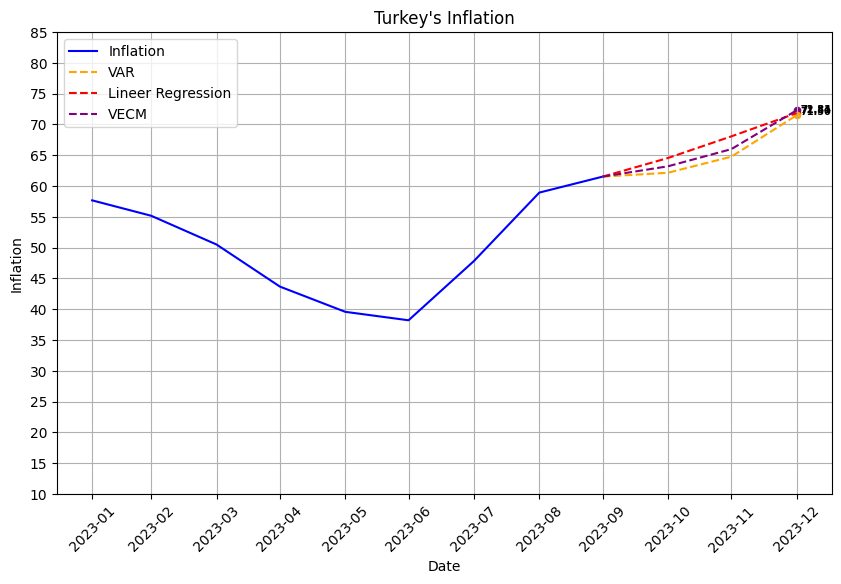

In [669]:
dates=pd.date_range('2007-02-28','2024-10-29' , freq='1M')
dff=dff.set_index(dates)
dfas4=dfas4.set_index(dates)
dfas5=dfas5.set_index(dates)







# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:200]["yillik_enflasyon_orani"], label='Inflation', color='blue')
#plt.plot(dfas2.iloc[198:203]["yillik_enflasyon_orani"],'--', label='Forecast with monetary tightening', color='green')
plt.plot(dfas5.iloc[199:203]["yillik_enflasyon_orani"],'--',label='VAR', color='orange')
plt.plot(dff.iloc[199:203]["yillik_enflasyon_orani"],'--',label='Lineer Regression', color='red')
plt.plot(dfas4.iloc[199:203]["yillik_enflasyon_orani"],'--',label='VECM', color='purple')



plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:].index, dff.iloc[191:].index.strftime('%Y-%m'), rotation=45)
y_max = int(max(dff["yillik_enflasyon_orani"].iloc[191:]))
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri3=dfas4["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri4=dfas5["yillik_enflasyon_orani"].iloc[202:203]



# Y ekseni etiketlerini ayarlama
for i, v in enumerate(son_dort_veri):
    plt.annotate(f'{v:.2f}', (son_dort_veri.index[i], v), xytext=(3, 0), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri.index,son_dort_veri,color='red',s=20)


for i, v in enumerate(son_dort_veri3):
    plt.annotate(f'{v:.2f}', (son_dort_veri3.index[i], v), xytext=(3, -2), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri3.index,son_dort_veri3,color='purple',s=20)

for i,v in enumerate(son_dort_veri4):
    plt.annotate(f'{v:.2f}', (son_dort_veri4.index[i], v), xytext=(3, 0), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri4.index,son_dort_veri4,color='orange',s=20)



#for i,v in enumerate(son_dort_veri6):
 #   plt.annotate(f'{v:.2f}', (son_dort_veri5.index[i], v), xytext=(3, -4), textcoords='offset points', fontsize=7,
  #               color='black', fontweight='bold')
   # plt.scatter(son_dort_veri6.index,son_dort_veri6,color='green',s=20)






# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()


#VAR ve VECM modelleri neredeyse aynı tahmini yaptığından üst üste gelmiş olarak gözüküyor.

In [670]:
lineer_regression=(((dff.loc['2023-10-31']["CPI"]/dff.loc['2023-09-30']["CPI"])-1)*100)
var=(((dfas5.loc['2023-10-31']["CPI"]/dfas5.loc['2023-09-30']["CPI"])-1)*100)
vecm=(((dfas4.loc['2023-10-31']["CPI"]/dfas4.loc['2023-09-30']["CPI"])-1)*100)
ortalama=(lineer_regression+var+vecm)/3







In [671]:
lineer_regression_yillik=(((dff.loc['2023-12-31']["CPI"]/dff.loc['2022-12-31']["CPI"])-1)*100)
var_yillik=(((dfas5.loc['2023-12-31']["CPI"]/dfas5.loc['2022-12-31']["CPI"])-1)*100)
vecm_yillik=(((dfas4.loc['2023-12-31']["CPI"]/dfas4.loc['2022-12-31']["CPI"])-1)*100)
ortalama_yillik=(lineer_regression_yillik+var_yillik+vecm_yillik)/3



In [672]:
lineer_regresyon_12ay=(((dff.loc['2024-09-30']["CPI"]/dff.loc['2023-09-30']["CPI"])-1)*100)
var_12ay=(((dfas5.loc['2024-09-30']["CPI"]/dfas5.loc['2023-09-30']["CPI"])-1)*100)
vecm_12ay=(((dfas4.loc['2024-09-30']["CPI"]/dfas4.loc['2023-09-30']["CPI"])-1)*100)
ortalama_12ay=(lineer_regresyon_12ay+var_12ay+vecm_12ay)/3

In [673]:
tahminler=pd.DataFrame({"Ekim 2023(Aylık)":[lineer_regression,var,vecm,ortalama],"Yıl Sonu":[lineer_regression_yillik,var_yillik,vecm_yillik,ortalama_yillik],"12 Ay Sonrası":[lineer_regresyon_12ay,var_12ay,vecm_12ay,ortalama_12ay]},index=["Lineer Regression","VAR","VECM","Ortalama"])
tahminler



,Ekim 2023(Aylık),Yıl Sonu,12 Ay Sonrası
Lineer Regression,5.485746,71.844457,63.264956
VAR,3.951408,71.502838,79.559854
VECM,4.622749,72.305076,97.080938
Ortalama,4.686634,71.884124,79.968583
